<a href="https://colab.research.google.com/github/anshulj99/Fuzzy/blob/main/Choke_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install -U scikit-fuzzy

In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [9]:
# Define universe variables
# Tubing Head pressure (x_THP) values range from 70 to 540 psi
# Gas Liquid ratio (x_GLR) values range from 0 to 27 Mscf/bbl
# Oil production rate (x_q) values range from 60 to 649 bbl/day
# Choke Adjustment values (x_choke) range from 0 to 45 percentage
# change
x_THP =np.arange(70, 541, 0.01)
x_GLR = np.arange(0, 28, 0.01)
x_q = np.arange(60, 650, 0.01)
x_choke = np.arange(-15, 30, 0.01)

In [10]:
# Create trapezoidal fuzzy membership functions for low, medium, and
# high linguistic variables.
THP_low=fuzz.trapmf(x_THP, [70, 70, 80, 120])
THP_med=fuzz.trapmf(x_THP, [80, 120, 230, 300])
THP_hi=fuzz.trapmf(x_THP, [230, 300, 540, 540])
GLR_low=fuzz.trapmf(x_GLR, [0, 0, 2, 4])
GLR_med=fuzz.trapmf(x_GLR, [2, 4, 7, 10])
GLR_hi=fuzz.trapmf(x_GLR, [7, 10, 27, 27])
q_low=fuzz.trapmf(x_q,[60, 60, 90, 160])
q_med=fuzz.trapmf(x_q, [90, 160, 260, 330])
q_hi=fuzz.trapmf(x_q, [260, 330, 650, 650])
choke_increase=fuzz.trapmf(x_choke,[-15, -15, -12,-9])
choke_fixed=fuzz.trapmf(x_choke, [-12, -9, 8,13])
choke_decrease=fuzz.trapmf(x_choke, [8,13, 30,30])

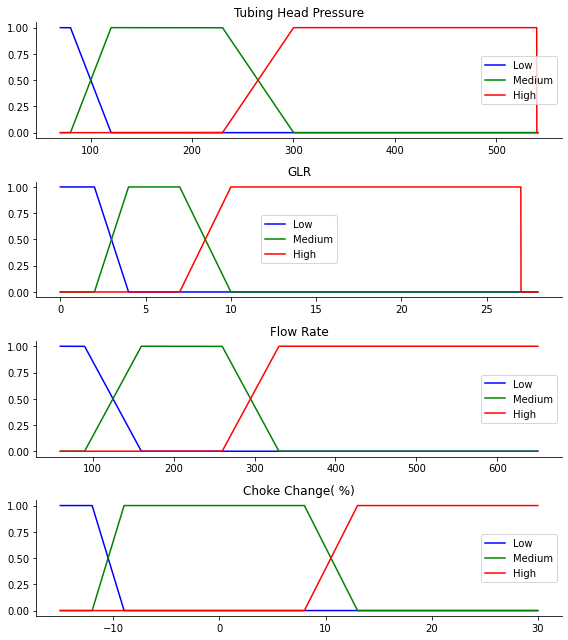

In [18]:
# Plot value ranges and the trapezoidal membership functions
fig, (ax0, ax1, ax2,ax3)=plt.subplots(nrows=4, figsize=(8, 9))
ax0.plot(x_THP, THP_low, 'b', linewidth=1.5, label='Low')
ax0.plot(x_THP, THP_med, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_THP, THP_hi, 'r', linewidth=1.5, label='High')
ax0.set_title('Tubing Head Pressure')
ax0.legend()
ax1.plot(x_GLR, GLR_low, 'b', linewidth=1.5, label='Low')
ax1.plot(x_GLR, GLR_med, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_GLR, GLR_hi, 'r', linewidth=1.5, label='High')
ax1.set_title('GLR')
ax1.legend()
ax2.plot(x_q, q_low, 'b', linewidth=1.5, label='Low')
ax2.plot(x_q, q_med, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_q, q_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Flow Rate')
ax2.legend()
ax3.plot(x_choke, choke_increase, 'b', linewidth=1.5, label='Low')
ax3.plot(x_choke, choke_fixed, 'g', linewidth=1.5, label='Medium')
ax3.plot(x_choke, choke_decrease, 'r', linewidth=1.5, label='High')
ax3.set_title('Choke Change( %)')
ax3.legend()
# Not Showing top and right axes
for ax in (ax0, ax1, ax2,ax3):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
plt.tight_layout()

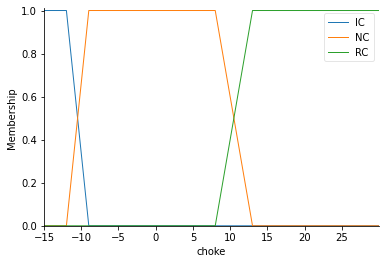

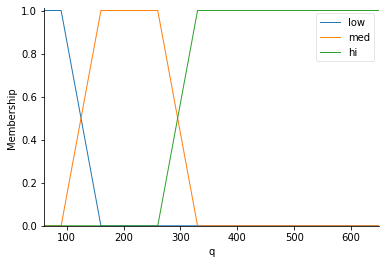

In [22]:
import numpy as np
import skfuzzy
from skfuzzy import control
# Define input variable for a fuzzy control system
THP=control.Antecedent(np.arange(70, 541, 1), 'THP')
GLR=control.Antecedent(np.arange(0, 28, 1), 'GLR')
q=control.Antecedent(np.arange(60, 650, 1), 'q')
choke=control.Consequent(np.arange(-15,30,0.01), 'choke')
# Create trapezoidal fuzzy membership functions
THP['low']=skfuzzy.trapmf(THP.universe, [70, 70, 80, 120])
THP['med']=skfuzzy.trapmf(THP.universe, [80, 120, 230, 300])
THP['hi']=skfuzzy.trapmf(THP.universe, [230, 300, 540, 540])
GLR['low']=skfuzzy.trapmf(GLR.universe, [0, 0, 2, 4])
GLR['med']=skfuzzy.trapmf(GLR.universe, [2, 4, 7, 10])
GLR['hi']=skfuzzy.trapmf(GLR.universe, [7, 10, 27, 27])
q['low']=skfuzzy.trapmf(q.universe,[60, 60, 90, 160])
q['med']=skfuzzy.trapmf(q.universe, [90, 160, 260, 330])
q['hi']=skfuzzy.trapmf(q.universe, [260, 330, 650, 650])
choke['IC']=skfuzzy.trapmf(choke.universe,[-15, -15, -12,-9])
choke['NC']=skfuzzy.trapmf(choke.universe, [-12, -9, 8, 13])
choke['RC']=skfuzzy.trapmf(choke.universe, [8,13, 30, 30])
# Plot Choke Membership Function
choke.view()
q.view()


In [38]:
# Defining Rule in a fuzzy control system to connect inputs to choke
# control decision
rule1=control.Rule(THP['low'] & GLR['low'] & q['low'], choke['IC'])
rule2=control.Rule(THP['low'] & GLR['med'] & q['low'], choke['IC'])
rule3=control.Rule(THP['low'] & GLR['hi'] & q['low'], choke['IC'])
rule4=control.Rule(THP['med'] & GLR['low'] & q['med'], choke['NC'])
rule5=control.Rule(THP['med'] & GLR['med'] & q['med'], choke['NC'])
rule6=control.Rule(THP['med'] & GLR['hi'] & q['med'], choke['NC'])
rule7=control.Rule(THP['hi'] & GLR['low'] & q['hi'], choke['RC'])
rule8=control.Rule(THP['hi'] & GLR['med'] & q['hi'], choke['RC'])
rule9=control.Rule(THP['hi'] & GLR['hi'] & q['hi'], choke['RC'])
rule10=control.Rule(THP['hi'] & GLR['low'] & q['low'], choke['IC'])
#Additional rules for 3D plot
rule11=control.Rule(THP['low'] & GLR['hi'] & q['hi'], choke['NC'])
rule12=control.Rule(THP['med'] & GLR['med'] & q['low'], choke['IC'])
rule13=control.Rule(THP['hi'] & GLR['med'] & q['low'], choke['NC'])
rule14=control.Rule(THP['hi'] & GLR['med'] & q['med'], choke['NC'])
rule15=control.Rule(THP['med'] & GLR['med'] & q['hi'], choke['RC'])
rule16=control.Rule(THP['low'] & GLR['med'] & q['med'], choke['IC'])
rule17=control.Rule(THP['low'] & GLR['med'] & q['hi'], choke['NC'])
# Define base classes for Fuzzy control system with 10 rules
choke_control=control.ControlSystem([rule1, rule2, rule3, rule4,
rule5, rule6, rule7, rule8, rule9, rule10,rule11,rule12,rule13,rule14,
rule15,rule16,rule17])

10.111101031095357


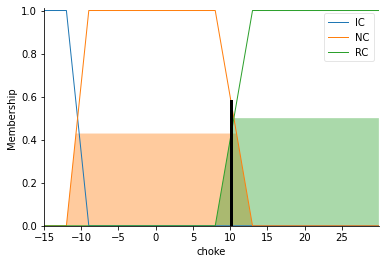

In [39]:
#Result computing from control system
choking=control.ControlSystemSimulation(choke_control)
# Provide inputs to the ControlSystem using input
choking.input['THP']=265
choking.input['GLR']=20
choking.input['q']=300
#compute the result of fuzzy system
choking.compute()
print (choking.output['choke'])
#plot the rules and final decision
choke.view(sim=choking)

Text(0.5, 0, 'Choke Adjustment (-%)')

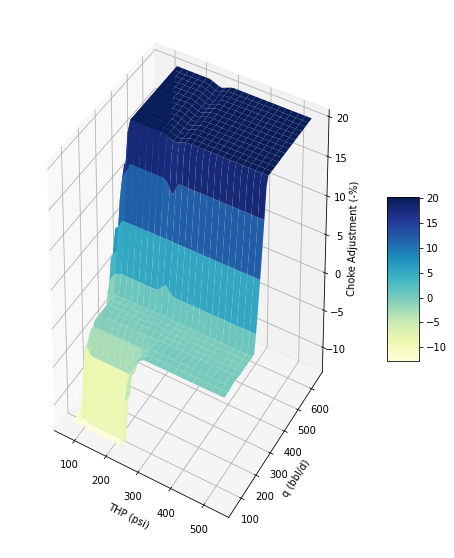

In [40]:
pts = 50
THP_highres=np.linspace(70, 540, pts+1)
q_highres=np.linspace(60, 640, pts+1)
x, y=np.meshgrid(THP_highres, q_highres)
z=np.zeros_like(x)
# Loop through the input values to calculate the corresponding control
# values
for i in range(pts+1):
 for j in range(pts+1):
  choking.input['THP']=x[i, j]
  choking.input['GLR']=5
  choking.input['q']=y[i, j]
  choking.compute()
  z[i, j]=choking.output['choke']


  
# Plot the 3D plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8, 10))
ax=fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(x, y, z, cmap='YlGnBu', linewidth=0.5)
fig.colorbar(surf, ax=ax, shrink=0.3,aspect=5)
ax.set_xlabel('THP (psi)')
ax.set_ylabel('q (bbl/d)')
ax.set_zlabel('Choke Adjustment (-%)')